In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)

## Problem 2: predicting New York City energy production

**Part 1:** Follow the [instruction I](https://github.com/um-perez-alvaro/Data-Science-Practice/blob/master/Jupyter%20Notebooks/Random%20Forests/homework/Instructions%201.docx?raw=true) and [instruction II](https://github.com/um-perez-alvaro/Data-Science-Practice/blob/master/Jupyter%20Notebooks/Random%20Forests/homework/Instructions%202.docx?raw=true) documents to download the weather and energy production datasets. 
Then, run the cell below.

In [5]:
# load weather data
path = '../../../Data/weather_NYC.csv' 
data = pd.read_csv(path,index_col='DATE',parse_dates=True)

# load energy consumption datasets
df_list = []
file_paths = ['../../../Data/load_NYC_2018.csv', '../../../Data/load_NYC_2019.csv']
for file in file_paths:
    df = pd.read_csv(file, 
                     usecols = ['RTD End Time Stamp','RTD Actual Load'], 
                     index_col='RTD End Time Stamp', 
                     parse_dates=True)
    df_list.append(df) 
data['LOAD'] = pd.concat(df_list).resample('d').mean() # average energy production
data.head()

,STATION,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,LOAD
DATE,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,USW00094789,17.67,NaN,0.00,0.0,0.0,12,18,7,310,310.0,29.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1719.182034
2018-01-02,USW00094789,15.66,NaN,0.00,0.0,0.0,18,26,13,260,270.0,23.0,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1764.714815
2018-01-03,USW00094789,8.28,NaN,0.00,0.0,0.0,21,28,12,260,270.0,19.9,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1699.275172
2018-01-04,USW00094789,28.19,NaN,0.49,8.0,1.2,25,29,19,340,330.0,44.1,55.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1722.843750
2018-01-05,USW00094789,25.05,NaN,0.00,0.0,7.9,15,19,9,290,290.0,36.0,46.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1773.566997


**Column descriptions:**

| column | description |
| :-- | --: |
| AWND | Average wind speed |
| PGTM | Peak gust time |
| PRCP | Precipitation |
| SNOW | Snowfall |
| SNWD | Snow depth |
| TAVG | Average Temperature |
| TMAX | Maximum temperature |
| TMIN | Minimum temperature |
| WDF2 | Direction of fastest 2-minute wind |
| WDF5 | Direction of fastest 5-second wind |
| WSF2 | Fastest 2-minute wind speed |
| WSF5 | Fastest 5-second wind speed |
| WT01 | Fog, ice fog, or freezing fog (may include heavy fog) |
| WT02 | Heavy fog or heaving freezing fog (not always distinguished from fog) |
| WT03 | Thunder |
| WT04 | Ice pellets, sleet, snow pellets, or small hail |
| WT05 | Hail (may include small hail) |
| WT06 | Glaze or rime |
| WT08 | Smoke or haze |
| WT09 | Blowing or drifting snow | 
| LOAD (**target vector**) | average electricity produced (in Watts) in the CAPITAL zone (see the picture below) |

![zones](nyc_zones.png)

Text(0.5, 0, 'date')

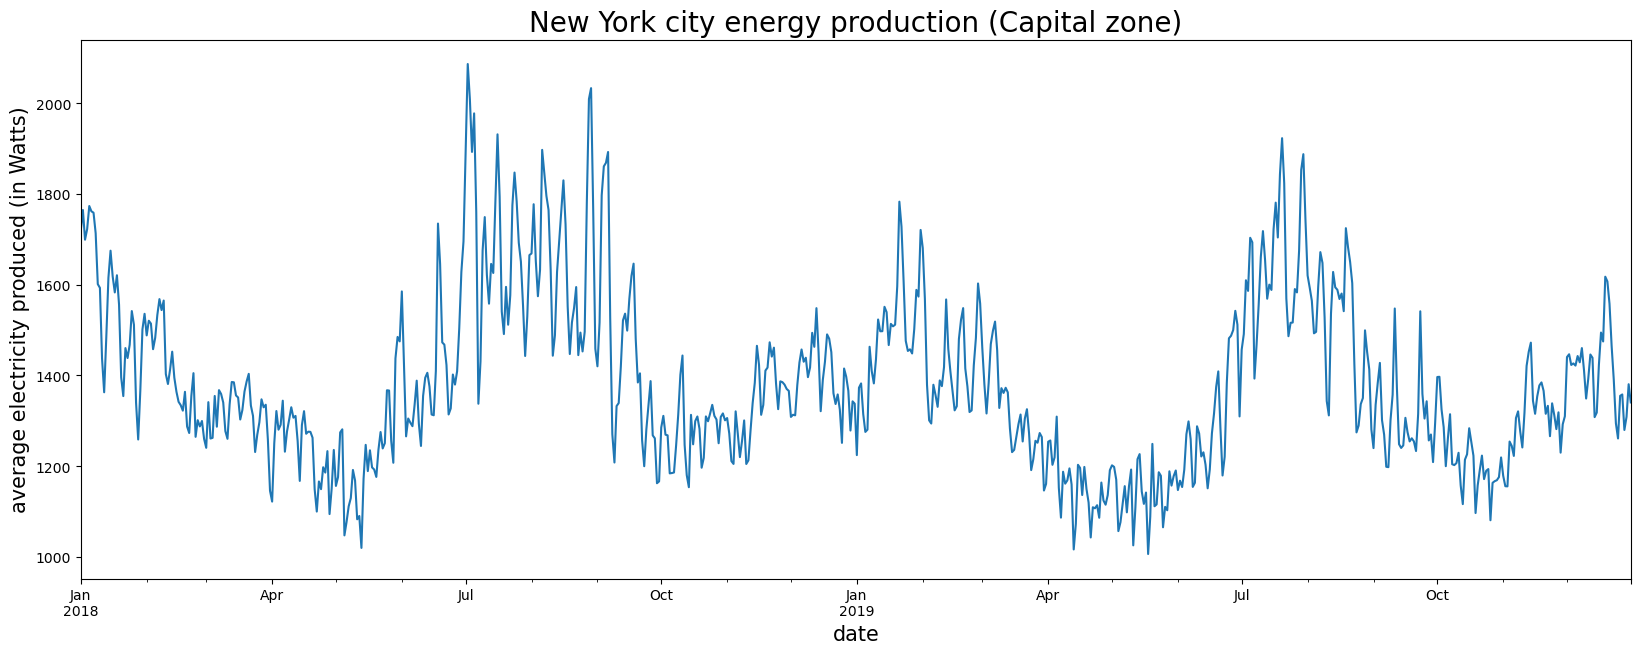

In [6]:
fig, ax = plt.subplots(figsize=(20,7))
data.LOAD.plot(ax=ax)
ax.set_title('New York city energy production (Capital zone)',fontsize=20)
ax.set_ylabel('average electricity produced (in Watts)', fontsize=15)
ax.set_xlabel('date', fontsize=15)

**Part 2:** add new columns  indicating the day of the week, the month, and whether a given date is a holiday.

**Part 3:** define the matrix X and the target vector y (column `LOAD`)

In [16]:
# feature matrix/target vector


The **goal** is to build a random forest pipeline that predicts the energy produced on a given day.
You'll train the regression model on the 2018 data, and test it on the 2019 data.

In [17]:
# training - test split
X_train = X[X.index.year==2018]
y_train = y[y.index.year==2018]
X_test = X[X.index.year==2019]
y_test = y[y.index.year==2019]

**Part 4:** Build a regression pipeline (feature preprocessor + random forest regression model). Then use a grid search to tune the pipeline hyperparameters.

In [20]:
# pipeline


In [1]:
# grid search


**Part 5:** Test your model on the 2019 data. 
Plot the `y_test` vector and the prediction.